# Подготовка

Импорт библиотек и применение настроек

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import daal4py as daal

np.set_printoptions(linewidth=np.inf)
sns.set_theme()

# Знакомство с датасетом

Для управления датасетом будем использовать библиотеку pandas

In [2]:
headers = ['instructor', 'class', 'repeat', 'attendance', 'difficulty'] + [f'Q{n}' for n in range(1, 29)]
df = pd.read_csv('turkey.csv', header=None, names=headers)
df

instructor  class  repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  \
0              1      2       1           0           4   3   3   3   3   3   
1              1      2       1           1           3   3   3   3   3   3   
2              1      2       1           2           4   5   5   5   5   5   
3              1      2       1           1           3   3   3   3   3   3   
4              1      2       1           0           1   1   1   1   1   1   
...          ...    ...     ...         ...         ...  ..  ..  ..  ..  ..   
5815           3     13       1           0           1   1   1   1   1   1   
5816           3     13       1           3           4   4   4   4   4   4   
5817           3     13       1           0           4   5   5   5   5   5   
5818           3     13       1           1           2   1   1   1   1   1   
5819           3     13       1           1           2   1   1   1   1   1   

      ...  Q19  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  
0     ...    3    3    3    3    3    3    3    3    3    3  
1     ...    3    3    3    3    3    3    3    3    3    3  
2     ...    5    5    5    5    5    5    5    5    5    5  
3     ...    3    3    3    3    3    3    3    3    3    3  
4     ...    1    1    1    1    1    1    1    1    1    1  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
5815  ...    1    1    1    1    1    1    1    1    1    1  
5816  ...    5    5    5    5    4    5    5    5    5    5  
5817  ...    5    5    5    5    5    5    5    5    5    5  
5818  ...    1    1    1    1    1    1    1    1    1    1  
5819  ...    1    1    1    1    1    1    1    1    1    1  

[5820 rows x 33 columns]

Данный датасет содержит 5280 строк. Каждая из строк - запись из опроса студентов о качетсве прпеодавания изучаемых ими предметов. В датасете содержатся данные по 13 предметам, преподаваемым 3-я преподавателями.

Колнки:

- instructor - порядковый номер преподавателя [1-3]
- class - порядковый номер предмета [1-13]
- repeat - количество раз, которое студент повторяет этот предмет
- attendance - оценка посещаемости предмета студентом [1-5]
- difficulty - оценка сложности предмета, данная студентом [1-5]
- Q1-Q28 - оценки, данные в ответ на различные вопросы о качестве преподавания предмета [1-5]

Найдём описательные статистики для каждой колонки, выбрав только записи предмета 1.

In [3]:
new_cols = []

for col in df.drop(['instructor', 'class'], axis=1):
    new_cols.append(
        df[col] \
        .where(df['class'] == 1) \
        .aggregate(
            [np.mean, np.std, np.min, np.max]
        )
    )

stats = pd.DataFrame(new_cols)

stats

mean       std  amin  amax
repeat      1.122112  0.383785   1.0   3.0
attendance  1.749175  1.512571   0.0   4.0
difficulty  2.488449  1.124250   1.0   5.0
Q1          3.171617  1.290664   1.0   5.0
Q2          3.363036  1.196111   1.0   5.0
Q3          3.399340  1.171799   1.0   5.0
Q4          3.330033  1.227441   1.0   5.0
Q5          3.356436  1.192561   1.0   5.0
Q6          3.316832  1.209214   1.0   5.0
Q7          3.339934  1.176462   1.0   5.0
Q8          3.257426  1.204188   1.0   5.0
Q9          3.445545  1.186083   1.0   5.0
Q10         3.382838  1.211959   1.0   5.0
Q11         3.498350  1.190121   1.0   5.0
Q12         3.389439  1.242256   1.0   5.0
Q13         3.508251  1.212148   1.0   5.0
Q14         3.511551  1.176072   1.0   5.0
Q15         3.501650  1.178939   1.0   5.0
Q16         3.481848  1.192763   1.0   5.0
Q17         3.574257  1.179403   1.0   5.0
Q18         3.518152  1.187197   1.0   5.0
Q19         3.524752  1.195417   1.0   5.0
Q20         3.501650  1.195673   1.0   5.0
Q21         3.541254  1.189405   1.0   5.0
Q22         3.524752  1.203698   1.0   5.0
Q23         3.481848  1.203816   1.0   5.0
Q24         3.415842  1.198238   1.0   5.0
Q25         3.501650  1.198439   1.0   5.0
Q26         3.504950  1.192891   1.0   5.0
Q27         3.369637  1.250961   1.0   5.0
Q28         3.574257  1.196130   1.0   5.0

Средняя оценка по всем критериям для этого предмета:

In [4]:
stats.drop(['repeat', 'attendance', 'difficulty'])['mean'].aggregate(np.mean)

3.438826025459688

Построим гистограму частот для оценок сложности этого предмета

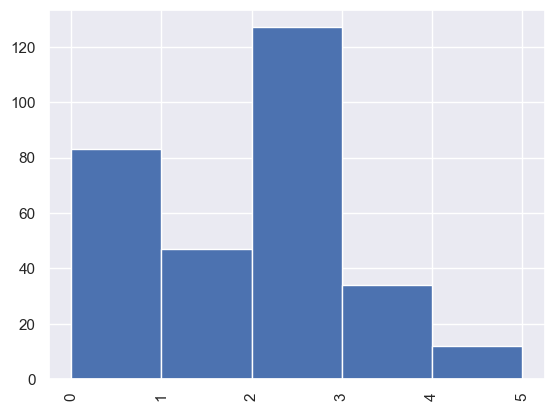

In [5]:
bins = np.arange(0, 6, 1)
pd.cut(df.where(df['class'] == 1)['difficulty'], bins, labels=bins[1:])\
    .value_counts().sort_index().plot.bar(align='edge', width=1)

plt.xticks(np.arange(len(bins)), bins)
plt.show()

И построим диаграму разброса средних значений кадого критерия по преподавателям

<AxesSubplot: >

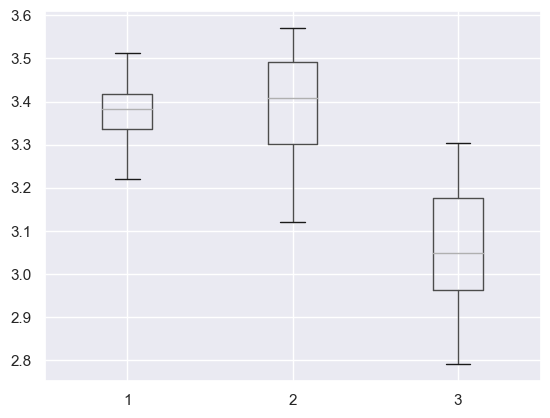

In [6]:
df.drop(['class', 'repeat', 'attendance', 'difficulty'], axis=1).groupby('instructor').aggregate(np.mean).transpose().boxplot()

Можем видеть, что преподавателя 3 в среднем оценивают хуже, чем остальных. При этом у преподавателя 1 разброс меньше чему у 2 и 3.

Построим матрицу корреляций значений оценок используя [covariance](https://intelpython.github.io/daal4py/algorithms.html?highlight=bacon#correlation-and-variance-covariance-matrices) из Intel DAAL

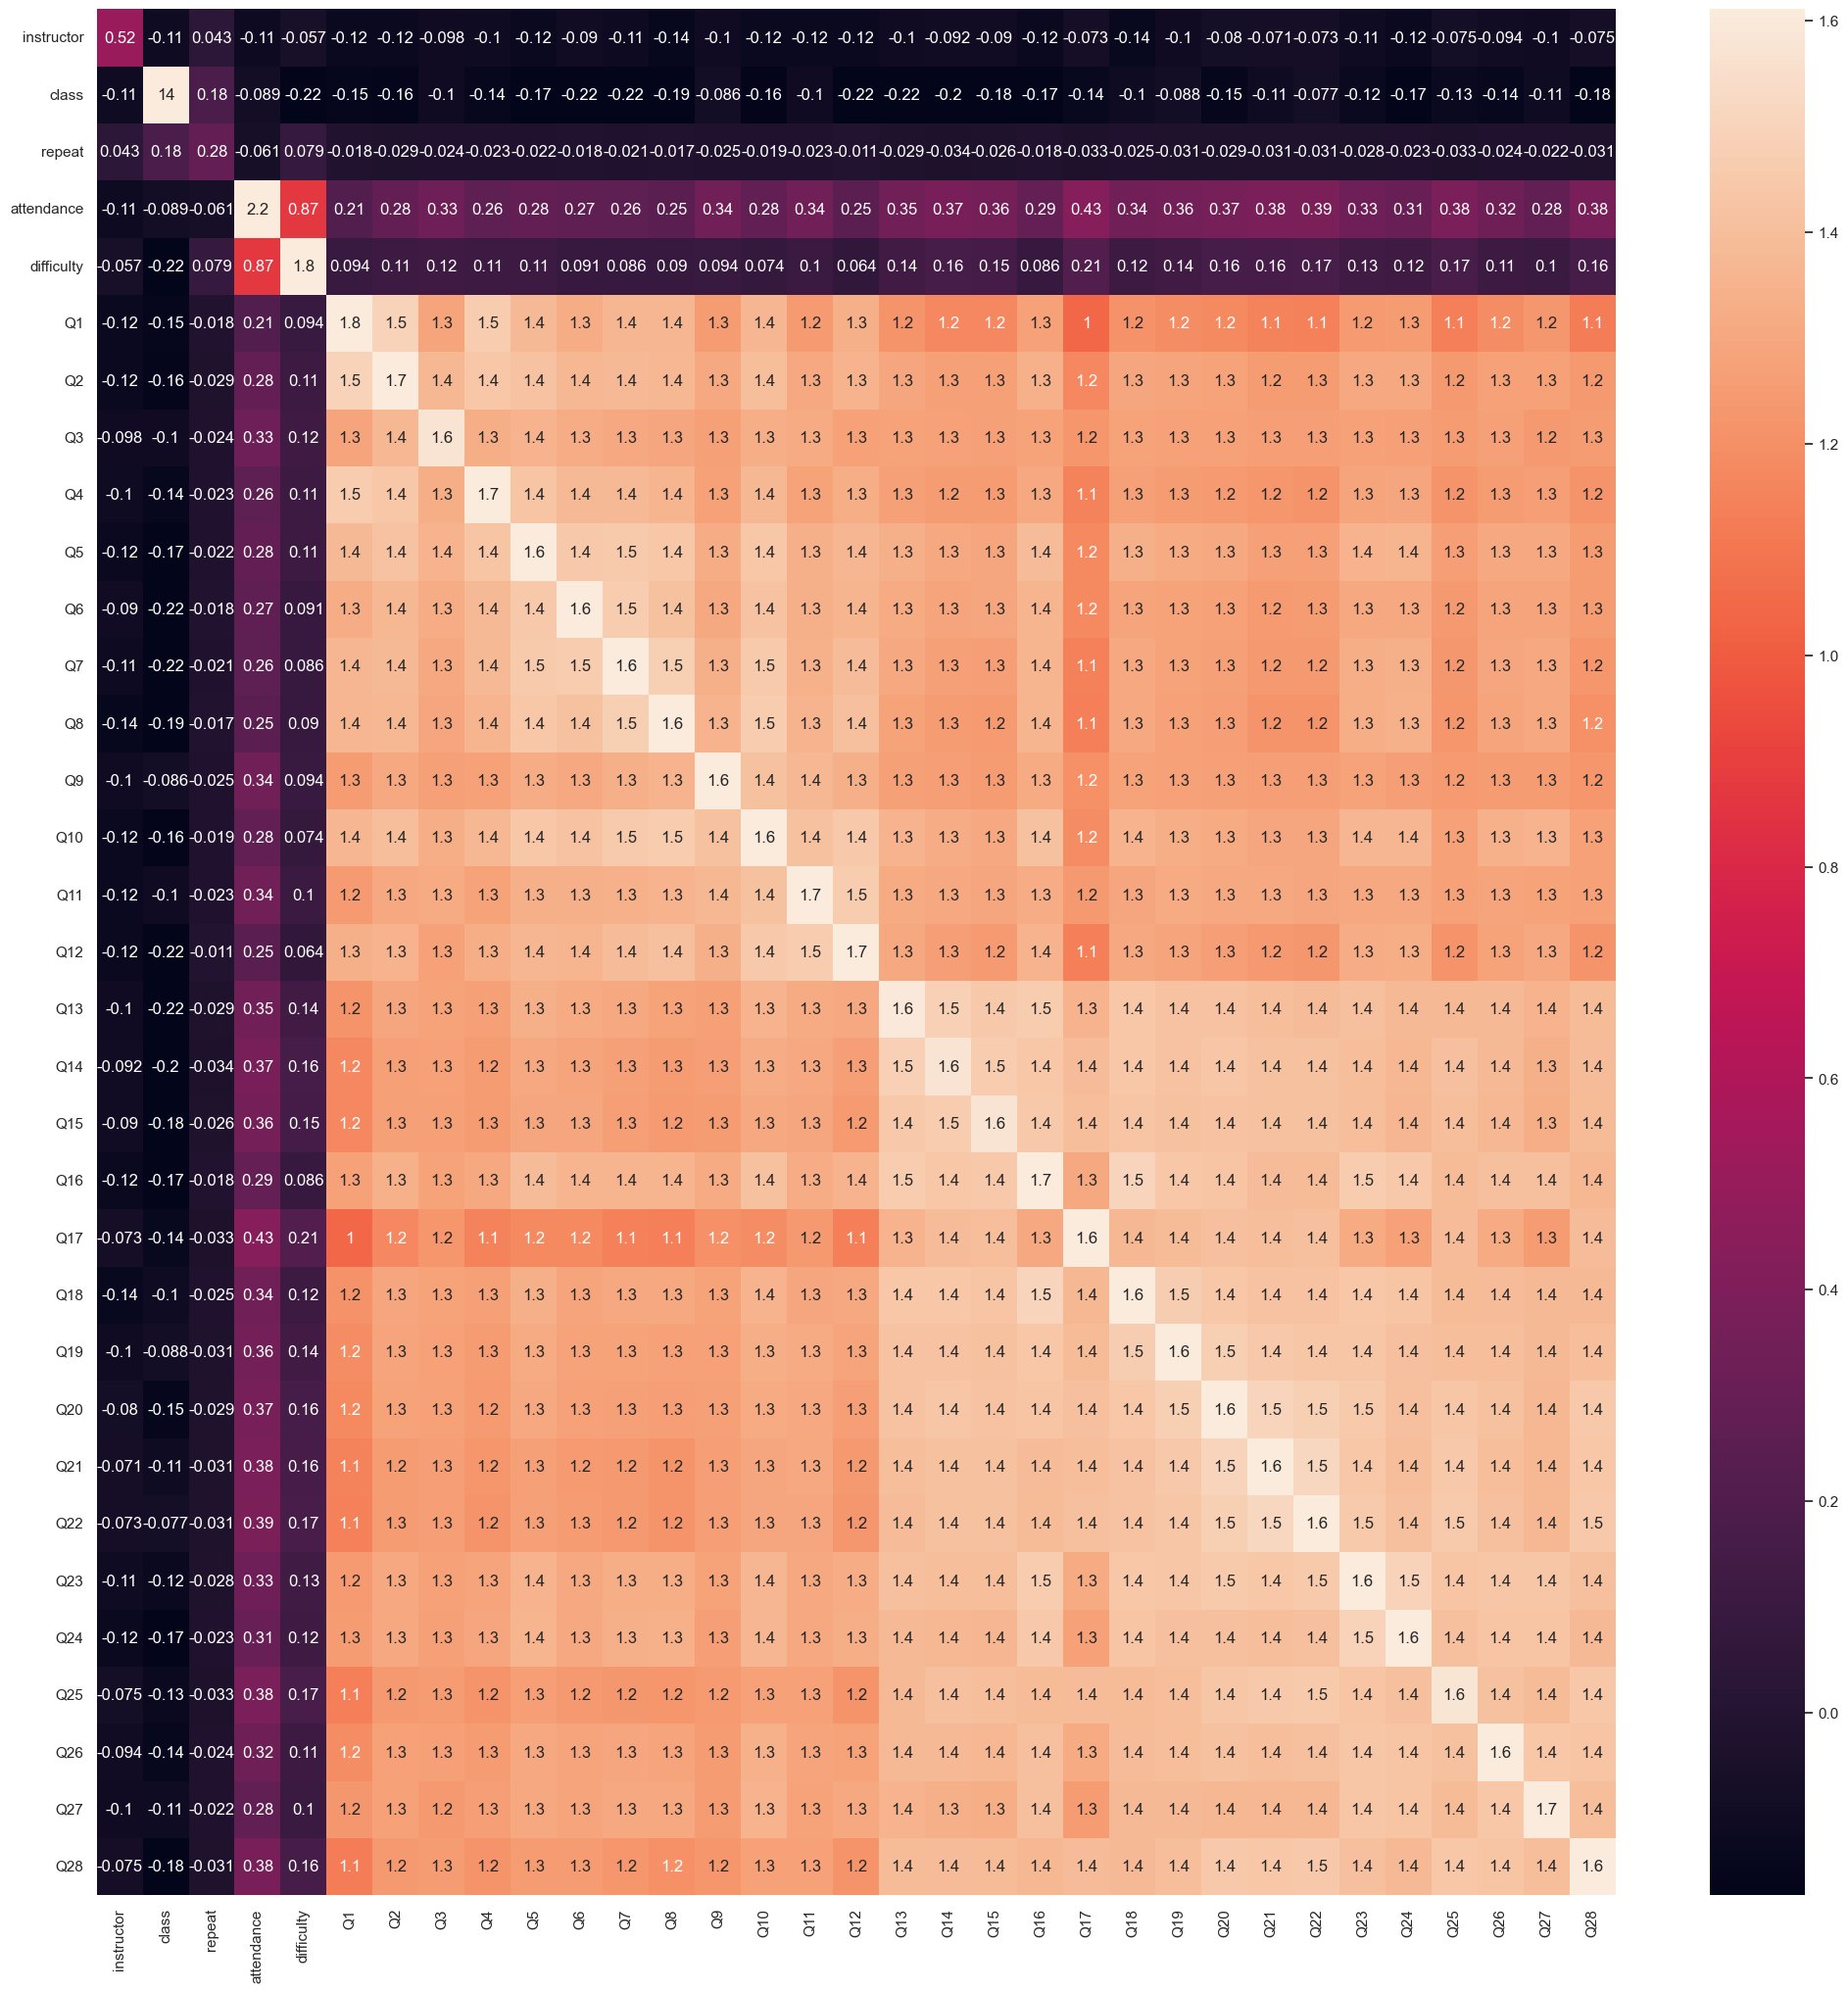

In [7]:
corcov = daal.covariance().compute(df.values)
cor = pd.DataFrame(corcov.correlation, columns=df.columns, index=df.columns)
plt.figure(figsize=(25, 25))
sns.heatmap(cor, robust=True, annot=True)
plt.show()

Можно заметить, что между вопросами 1-12 и 13-28 наблюдается повышеннаяе кореляция (более светлые зоны), что может говорить о связи между вопросами - вопросы про связанные аспекты преподавателей могли быть сгруппированы вместе.

# Фильтрация недостоверных данных и выбросов

Просматривая датасет, можно заметить, что в некоторых строках все ответы на вопросы Q1-Q28 одинаковые. Хотя такое и не невозможно, наиболее вероятно, что такие ответы были даны опрашиваемым, которому было лень честно отвечать на все вопросы и он просто проставил везде одинаковые галочки. Для улучшения результатов анализа данных можно избавиться от таких строк.

In [8]:
# Функция проверки, что все элементы последовательности одинаковые
def not_the_same(row):
    return not np.all(row.values == row.values[0])

filter = (
    df.loc[:, 'Q1':]  # Выбрать только колонки с вопросами (Q1-Q28)
    .apply(not_the_same, axis=1)  # Применить функцию проверки
)

filtered_df = (
    df[filter]  # Отфильтровать только прошедшие проверку строки
    .reset_index(drop=True)  # Переиндексировать датасет
)

filtered_df

instructor  class  repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  \
0              1      2       1           1           3   4   4   4   4   4   
1              1      2       1           2           3   1   1   1   1   1   
2              1      2       1           3           4   5   5   4   4   5   
3              1      2       1           3           3   3   3   3   3   3   
4              1      2       1           2           4   5   3   3   3   2   
...          ...    ...     ...         ...         ...  ..  ..  ..  ..  ..   
2830           3     13       1           3           5   2   2   2   1   1   
2831           3     13       1           3           3   1   1   1   5   1   
2832           3     13       2           3           4   2   3   3   3   3   
2833           3     13       1           2           4   1   1   1   1   1   
2834           3     13       1           3           4   4   4   4   4   4   

      ...  Q19  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  
0     ...    4    4    4    4    4    4    4    4    4    4  
1     ...    2    3    3    3    2    2    1    1    1    1  
2     ...    5    4    4    5    5    4    4    4    5    4  
3     ...    3    2    1    1    1    3    2    2    2    2  
4     ...    2    2    4    4    5    5    4    4    5    5  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2830  ...    1    1    1    1    1    1    1    1    1    1  
2831  ...    2    3    2    2    3    2    2    3    2    2  
2832  ...    3    3    3    3    3    3    3    3    3    3  
2833  ...    2    1    1    2    1    1    1    1    1    1  
2834  ...    5    5    5    5    4    5    5    5    5    5  

[2835 rows x 33 columns]

В результате, датасет уменьшился почти в два раза. Посмотрим на матрицу корреляций для отфильтрованного датасета

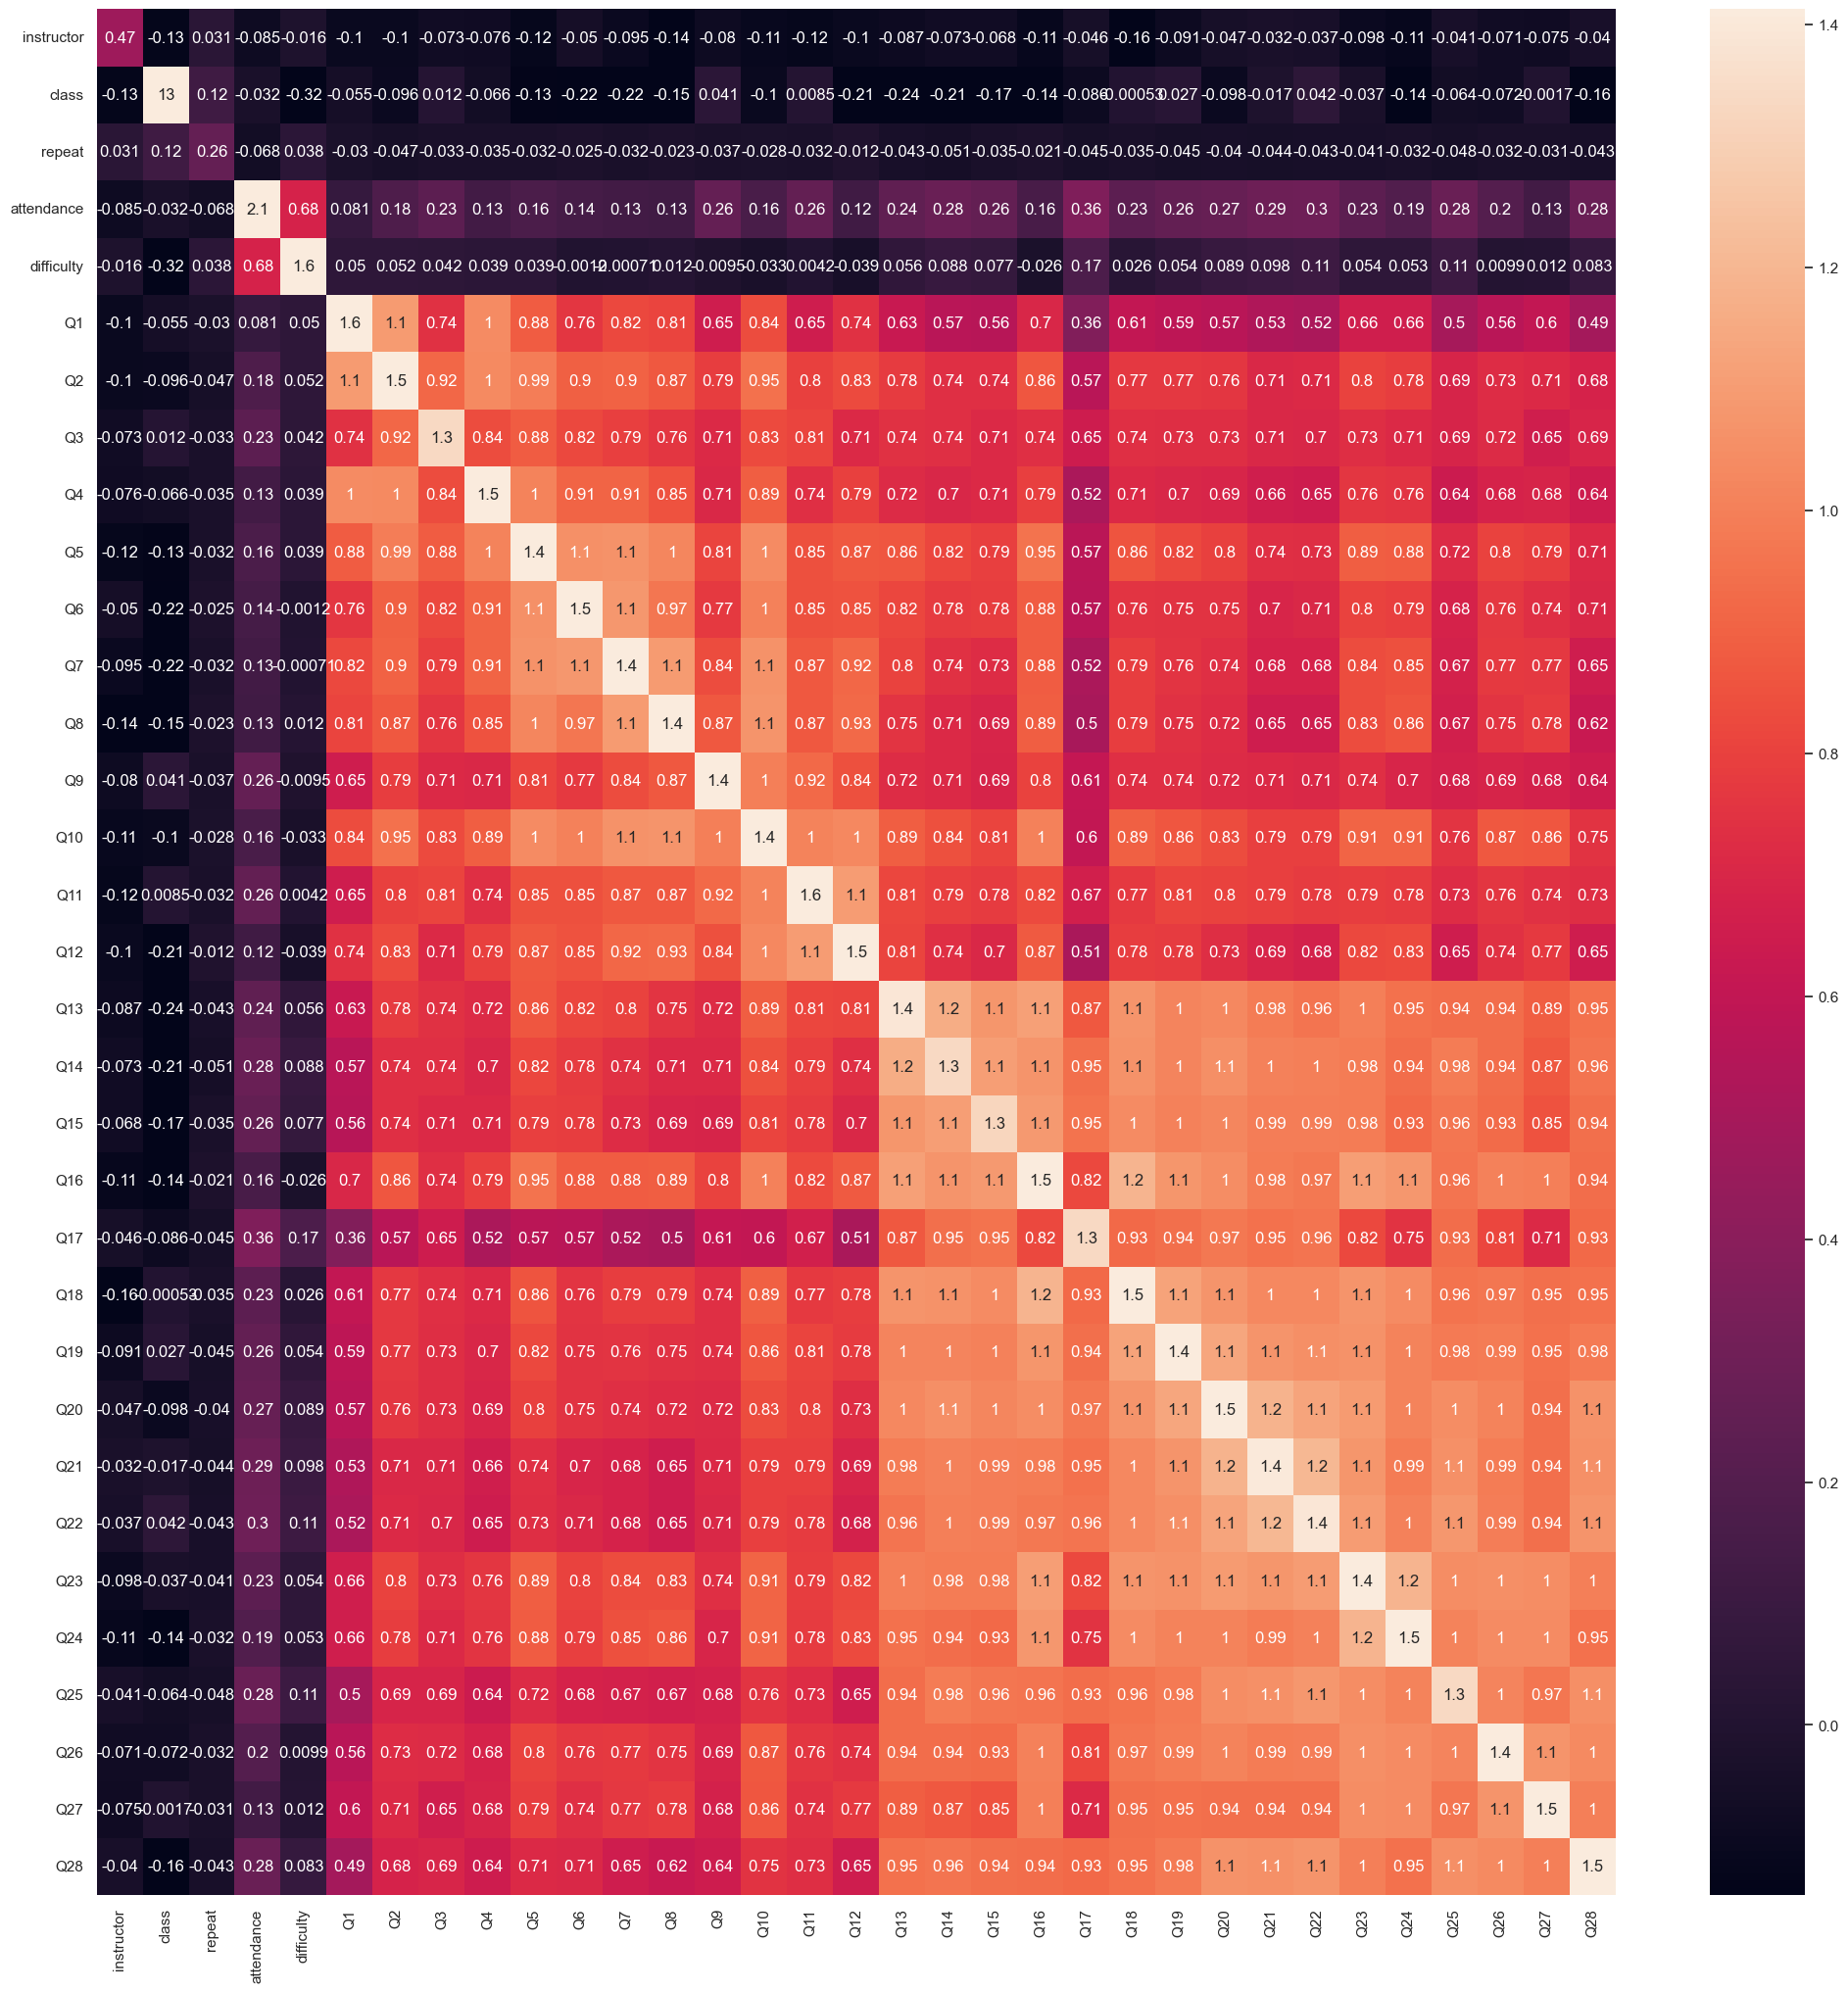

In [9]:
corcov_filtered = daal.covariance().compute(filtered_df.values)
cor_filtered = pd.DataFrame(corcov_filtered.correlation, columns=filtered_df.columns, index=filtered_df.columns)
plt.figure(figsize=(25, 25))
sns.heatmap(cor_filtered, robust=True, annot=True)
plt.show()

Как можно видеть, корреляция у многих вопросов понизилась, что означает, что недостоверные ответы приводили к ложной корреляции. Тем не менее, ранее замеченные зависимости между вопросами 1-12 и 13-28 всё равно наблюдаются. Также, стало лучше видно, что соседние вопросы чаще имеют высокую корреляцию, нежели вопросы на некотором расстоянии друг от друга.

# Нормализация данных

Иногда, для работы с данными, необходимо, чтобы значения были нормализованы. Проведём нормализацию используя метод [z-score](https://intelpython.github.io/daal4py/algorithms.html?highlight=bacon#z-score) из Intel DAAL

In [10]:
subset = filtered_df.loc[:, 'repeat':]  # Подмножество занчений, для которых имеет смысл нормализация

# Нормализация
zscore = daal.normalization_zscore()
result = zscore.compute(subset.values)

# Воссоздать датасет из нормализованных данных
nromalized_subset = pd.DataFrame(result.normalizedData, columns=subset.columns)\
    .apply(lambda x: np.round(x, 3)) # Округлим до 3х знаков после запятой

# Соединить с ненормализованными колонками
normalized_df = pd.concat([filtered_df.loc[:, :'class'], nromalized_subset], axis=1)
normalized_df


instructor  class  repeat  attendance  difficulty     Q1     Q2     Q3  \
0              1      2  -0.196      -0.868       0.095  1.369  1.074  0.859   
1              1      2  -0.196       0.132       0.095 -1.631 -1.926 -2.141   
2              1      2  -0.196       1.132       1.095  2.369  2.074  0.859   
3              1      2  -0.196       1.132       0.095  0.369  0.074 -0.141   
4              1      2  -0.196       0.132       1.095  2.369  0.074 -0.141   
...          ...    ...     ...         ...         ...    ...    ...    ...   
2830           3     13  -0.196       1.132       2.095 -0.631 -0.926 -1.141   
2831           3     13  -0.196       1.132       0.095 -1.631 -1.926 -2.141   
2832           3     13   0.804       1.132       1.095 -0.631  0.074 -0.141   
2833           3     13  -0.196       0.132       1.095 -1.631 -1.926 -2.141   
2834           3     13  -0.196       1.132       1.095  1.369  1.074  0.859   

         Q4     Q5  ...    Q19   Q20    Q21    Q22    Q23    Q24    Q25  \
0     1.056  1.008  ...  0.688  0.64  0.594  0.574  0.811  0.883  0.584   
1    -1.944 -1.992  ... -1.312 -0.36 -0.406 -0.426 -1.189 -1.117 -2.416   
2     1.056  2.008  ...  1.688  0.64  0.594  1.574  1.811  0.883  0.584   
3     0.056  0.008  ... -0.312 -1.36 -2.406 -2.426 -2.189 -0.117 -1.416   
4     0.056 -0.992  ... -1.312 -1.36  0.594  0.574  1.811  1.883  0.584   
...     ...    ...  ...    ...   ...    ...    ...    ...    ...    ...   
2830 -1.944 -1.992  ... -2.312 -2.36 -2.406 -2.426 -2.189 -2.117 -2.416   
2831  2.056 -1.992  ... -1.312 -0.36 -1.406 -1.426 -0.189 -1.117 -1.416   
2832  0.056  0.008  ... -0.312 -0.36 -0.406 -0.426 -0.189 -0.117 -0.416   
2833 -1.944 -1.992  ... -1.312 -2.36 -2.406 -1.426 -2.189 -2.117 -2.416   
2834  1.056  1.008  ...  1.688  1.64  1.594  1.574  0.811  1.883  1.584   

        Q26    Q27    Q28  
0     0.769  0.908  0.593  
1    -2.231 -2.092 -2.407  
2     0.769  1.908  0.593  
3    -1.231 -1.092 -1.407  
4     0.769  1.908  1.593  
...     ...    ...    ...  
2830 -2.231 -2.092 -2.407  
2831 -0.231 -1.092 -1.407  
2832 -0.231 -0.092 -0.407  
2833 -2.231 -2.092 -2.407  
2834  1.769  1.908  1.593  

[2835 rows x 33 columns]